In [1]:
import numpy as np
import sftrident as sf
import matplotlib.pylab as plt

/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: n

In [9]:
def internalInt(n):
    def tempInt(x,dphi):
        return sf.pulseLib.getPulse('cos',['analytic'])[1](n)(x,dphi)*(x<dphi)*(x>-dphi) + sf.pulseLib.getPulse('cos',['analytic'])[1](n)(np.array([dphi]),dphi)*(x>=dphi)+sf.pulseLib.getPulse('cos',['analytic'])[1](n)(-np.array([dphi]),dphi)*(x<=-dphi)
    return tempInt

In [10]:
def G(eta,alphas,a0,dphi):
    etaArr = np.array([eta])
    print "G -----------------"
    print "alpha1: %s"%(alphas[0])
    print "alpha2: %s"%(alphas[1])
    print "a0: %s"%a0
    print "dphi: %s"%dphi
    print "etaMax: %s"%eta
    print "internalInt1: %s"%(internalInt(0)(etaArr,dphi))
    print "internalInt2: %s"%(internalInt(2)(etaArr,dphi))
    print "====================="
    return a0*alphas[0]*internalInt(0)(etaArr,dphi) + a0*alphas[1]*internalInt(2)(etaArr,dphi)

def Gfac(alphas,a0,dphi,etaMax=1000):
    return np.exp(1j*G(etaMax,alphas,a0,dphi)) + np.exp(1j*G(-etaMax,alphas,a0,dphi))

def GfacLin(alphas,a0,dphi,etaMax=1000):
    etaArr = np.array([etaMax])
    print "alpha1: %s"%(alphas[0])
    print "alpha2: %s"%(alphas[1])
    print "a0: %s"%a0
    print "dphi: %s"%dphi
    print "etaMax: %s"%etaMax
    return 2 + 1j*a0*(alphas[0]*internalInt(0)(etaArr,dphi) + alphas[1]*internalInt(2)(etaArr,dphi)) + + 1j*a0*(alphas[0]*internalInt(0)(-etaArr,dphi) + alphas[1]*internalInt(2)(-etaArr,dphi))
    #return 2 + 1j*(G(etaArr,alphas,a0,dphi) + G(-etaArr,alphas,a0,dphi))

def Gfac2nd(alphas,a0,dphi,etaMax=1000):
    etaArr = np.array([etaMax])
    print "-"*15
    print "internalInt1: %s"%(internalInt(0)(etaArr,dphi))
    print "internalInt2: %s"%(internalInt(2)(etaArr,dphi))
    return 2 + 1j*a0*(alphas[0]*internalInt(0)(etaArr,dphi) + alphas[1]*internalInt(2)(etaArr,dphi)) + (1j*a0)**2*((alphas[0]*internalInt(0)(etaArr,dphi))**2 + (alphas[1]*internalInt(2)(etaArr,dphi))**2)

G -----------------
alpha1: [[-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 ...
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]]
alpha2: [[-20.         -20.         -20.         ... -20.         -20.
  -20.        ]
 [-19.95995996 -19.95995996 -19.95995996 ... -19.95995996 -19.95995996
  -19.95995996]
 [-19.91991992 -19.91991992 -19.91991992 ... -19.91991992 -19.91991992
  -19.91991992]
 ...
 [ 19.91991992  19.91991992  19.91991992 ...  19.91991992  19.91991992
   19.91991992]
 [ 19.95995996  19.95995996  19.95995996 ...  19.95995996  19.95995996
   19.95995996]
 [ 2

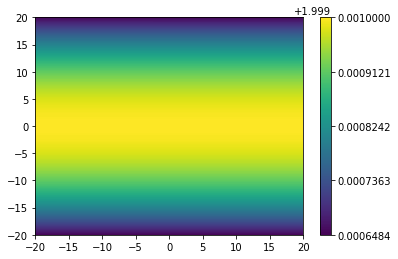

In [11]:
a0=1e-4
dphi=50
etMax=100000
al1=np.linspace(-20,20,1000)
al2=np.linspace(-20,20,1000)

XX,YY = np.meshgrid(al1,al2)
ZZraw=np.real(Gfac([XX,YY],a0,dphi,etMax))
#ZZ=np.ones(ZZraw.shape)*2-ZZraw
ZZ=ZZraw
contourLevels = np.linspace(ZZ.min(),ZZ.max(),300)

CS = plt.contourf(XX,YY,ZZ,levels = contourLevels)
barlines = np.linspace(ZZ.min(),ZZ.max(),5)
plt.colorbar(CS,ticks=barlines)
plt.show()

alpha1: [[-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 ...
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]]
alpha2: [[-20.         -20.         -20.         ... -20.         -20.
  -20.        ]
 [-19.95995996 -19.95995996 -19.95995996 ... -19.95995996 -19.95995996
  -19.95995996]
 [-19.91991992 -19.91991992 -19.91991992 ... -19.91991992 -19.91991992
  -19.91991992]
 ...
 [ 19.91991992  19.91991992  19.91991992 ...  19.91991992  19.91991992
   19.91991992]
 [ 19.95995996  19.95995996  19.95995996 ...  19.95995996  19.95995996
   19.95995996]
 [ 20.          20.     

ValueError: Contour levels must be increasing

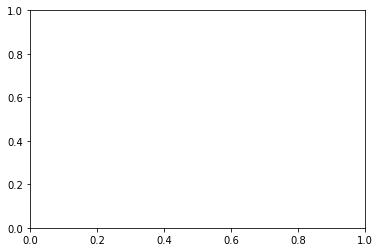

In [12]:
a0=1e-4
dphi=50
etMax=1e8
al1=np.linspace(-20,20,1000)
al2=np.linspace(-20,20,1000)

XX,YY = np.meshgrid(al1,al2)
ZZraw=np.imag(GfacLin([XX,YY],a0,dphi,etMax))
#ZZ=np.ones(ZZraw.shape)*2-ZZraw
ZZ=ZZraw
contourLevels = np.linspace(ZZ.min(),ZZ.max(),300)
#print contourLevels

CS = plt.contourf(XX,YY,ZZ,levels = contourLevels)
barlines = np.linspace(ZZ.min(),ZZ.max(),5)
plt.colorbar(CS,ticks=barlines)
plt.show()

---------------
internalInt1: [0.00051996]
internalInt2: [9.37499981]
[1.99964844 1.99964961 1.99965079 1.99965196 1.99965314 1.99965432
 1.99965549 1.99965667 1.99965784 1.99965902 1.9996602  1.99966137
 1.99966255 1.99966372 1.9996649  1.99966607 1.99966725 1.99966843
 1.9996696  1.99967078 1.99967195 1.99967313 1.9996743  1.99967548
 1.99967666 1.99967783 1.99967901 1.99968018 1.99968136 1.99968254
 1.99968371 1.99968489 1.99968606 1.99968724 1.99968841 1.99968959
 1.99969077 1.99969194 1.99969312 1.99969429 1.99969547 1.99969665
 1.99969782 1.999699   1.99970017 1.99970135 1.99970252 1.9997037
 1.99970488 1.99970605 1.99970723 1.9997084  1.99970958 1.99971075
 1.99971193 1.99971311 1.99971428 1.99971546 1.99971663 1.99971781
 1.99971899 1.99972016 1.99972134 1.99972251 1.99972369 1.99972486
 1.99972604 1.99972722 1.99972839 1.99972957 1.99973074 1.99973192
 1.99973309 1.99973427 1.99973545 1.99973662 1.9997378  1.99973897
 1.99974015 1.99974133 1.9997425  1.99974368 1.99974485 1.99

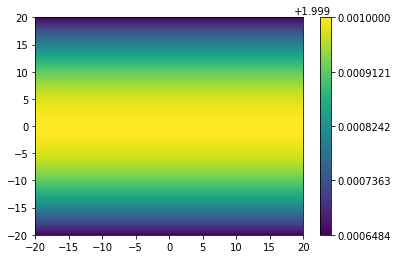

In [13]:
a0=1e-4
dphi=50
etMax=1e8
al1=np.linspace(-20,20,1000)
al2=np.linspace(-20,20,1000)

XX,YY = np.meshgrid(al1,al2)
ZZraw=np.real(Gfac2nd([XX,YY],a0,dphi,etMax))
#ZZ=np.ones(ZZraw.shape)*2-ZZraw
ZZ=ZZraw
contourLevels = np.linspace(ZZ.min(),ZZ.max(),300)
print contourLevels

CS = plt.contourf(XX,YY,ZZ,levels = contourLevels)
barlines = np.linspace(ZZ.min(),ZZ.max(),5)
plt.colorbar(CS,ticks=barlines)
plt.show()

In [ ]:
dphi=50
etaArr=np.linspace(0.0,100000,10000)
vals1 = internalInt(0)(etaArr,dphi)
vals2 = internalInt(2)(etaArr,dphi)
plt.plot(etaArr,vals1,label='$I_1$')
plt.plot(etaArr,vals2,label='$I_2$')
plt.legend()
plt.show()